# Benchmark Results for Insertion

In [22]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 6]


In [23]:
data = json.load(open('../results/benchmark_insertion_o2.json'))
benchmarks_raw = pd.DataFrame(data['benchmarks'])
benchmarks_raw.rename({'per_family_instance_index': 'data_size', 'family_index': 'benchmark_name'}, axis=1, inplace=True)

benchmarks_raw['data_size'] = benchmarks_raw['data_size'].replace(0, '1 KB')
benchmarks_raw['data_size'] = benchmarks_raw['data_size'].replace(1, '10 KB')
benchmarks_raw['data_size'] = benchmarks_raw['data_size'].replace(2, '100 KB')
benchmarks_raw['data_size'] = benchmarks_raw['data_size'].replace(3, '1 MB')
benchmarks_raw['data_size'] = benchmarks_raw['data_size'].replace(4, '10 MB')
benchmarks_raw['data_size'] = benchmarks_raw['data_size'].replace(5, '100 MB')
benchmarks_raw['data_size'] = benchmarks_raw['data_size'].replace(6, '1 GB')


benchmarks_raw['benchmark_name'] = benchmarks_raw['benchmark_name'].replace(0, 'BST')
benchmarks_raw['benchmark_name'] = benchmarks_raw['benchmark_name'].replace(1, 'SortedVector')
benchmarks_raw['benchmark_name'] = benchmarks_raw['benchmark_name'].replace(2, 'SortedOnAccessVector')
benchmarks_raw['benchmark_name'] = benchmarks_raw['benchmark_name'].replace(3, 'TreeSet')
benchmarks_raw['benchmark_name'] = benchmarks_raw['benchmark_name'].replace(4, 'HashSet')
benchmarks_raw['benchmark_name'] = benchmarks_raw['benchmark_name'].replace(5, 'SortedList')
benchmarks_raw['benchmark_name'] = benchmarks_raw['benchmark_name'].replace(6, 'SortedOnAccessList')

benchmarks_raw

,cpu_time,benchmark_name,iterations,name,data_size,real_time,repetition_index,repetitions,run_name,run_type,threads,time_unit
0,0.061,BST,10000,InsertionFixture/BST_Insertion/128,1 KB,0.061,0,1,InsertionFixture/BST_Insertion/128,iteration,1,ms
1,0.665,BST,1000,InsertionFixture/BST_Insertion/1280,10 KB,0.665,0,1,InsertionFixture/BST_Insertion/1280,iteration,1,ms
2,7.824,BST,100,InsertionFixture/BST_Insertion/12800,100 KB,7.825,0,1,InsertionFixture/BST_Insertion/12800,iteration,1,ms
3,75.789,BST,10,InsertionFixture/BST_Insertion/131072,1 MB,75.790,0,1,InsertionFixture/BST_Insertion/131072,iteration,1,ms
4,795.350,BST,1,InsertionFixture/BST_Insertion/1310720,10 MB,795.381,0,1,InsertionFixture/BST_Insertion/1310720,iteration,1,ms
5,"17,164.903",BST,1,InsertionFixture/BST_Insertion/13107200,100 MB,"17,183.173",0,1,InsertionFixture/BST_Insertion/13107200,iteration,1,ms
6,"259,923.268",BST,1,InsertionFixture/BST_Insertion/134217728,1 GB,"259,959.200",0,1,InsertionFixture/BST_Insertion/134217728,iteration,1,ms
7,0.619,SortedVector,1000,InsertionFixture/SortedVector_Insertion/128,1 KB,0.619,0,1,InsertionFixture/SortedVector_Insertion/128,iteration,1,ms
8,6.019,SortedVector,100,InsertionFixture/SortedVector_Insertion/1280,10 KB,6.019,0,1,InsertionFixture/SortedVector_Insertion/1280,iteration,1,ms
9,59.445,SortedVector,10,InsertionFixture/SortedVector_Insertion/12800,100 KB,59.448,0,1,InsertionFixture/SortedVector_Insertion/12800,iteration,1,ms


## CPU Time (ms)

In [24]:
benchmarks = benchmarks_raw.pivot_table('cpu_time', ['data_size', ], 'benchmark_name')
benchmarks = benchmarks.reindex(['1 KB', '10 KB', '100 KB', '1 MB', '10 MB', '100 MB', '1 GB'], axis=0)
benchmarks.replace(np.nan, np.inf, inplace=True)
pd.options.display.float_format = "{:,.3f}".format
benchmarks

benchmark_name,BST,HashSet,SortedList,SortedOnAccessList,SortedOnAccessVector,SortedVector,TreeSet
data_size,,,,,,,
1 KB,0.061,0.046,7.654,5.584,0.569,0.619,0.071
10 KB,0.665,0.459,67.573,5.495,5.405,6.019,0.740
100 KB,7.824,4.589,720.534,264.067,8.455,59.445,7.455
1 MB,75.789,47.492,"179,323.784",282.016,43.238,659.658,76.414
10 MB,795.350,470.293,inf,910.071,209.881,"75,072.770",827.399
100 MB,"17,164.903","6,129.591",inf,"7,449.414",881.230,inf,"15,926.286"
1 GB,"259,923.268","89,966.237",inf,"116,023.335","10,718.620",inf,"256,758.034"


## Plot

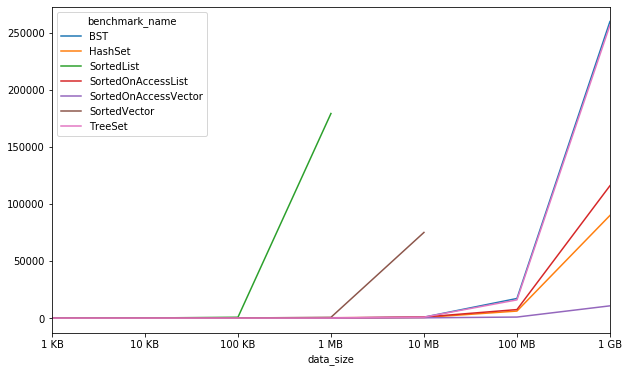

In [25]:
ax = benchmarks.plot()
plt.show()